In [7]:
import numpy as np
import matplotlib.pyplot as plt
# A function to create a dataset.
from sklearn.datasets import make_regression
# A library for data manipulation and analysis.
import pandas as pd
# Some functions defined specifically for this notebook.
import w3_tools

# Output of plotting commands is displayed inline within the Jupyter notebook.
%matplotlib inline 

# Set a seed so that the results are consistent.
np.random.seed(3) 

import w3_unittest

<a name='1'></a>
## 1 - Simple Linear Regression

**Linear regression** is a linear approach for modelling the relationship between a scalar response (**dependent variable**) and one or more explanatory variables (**independent variables**). The case of one independent variable is called **simple linear regression**; for more than one, it is called **multiple linear regression**. 

<a name='1.1'></a>
### 1.1 - Simple Linear Regression Model

Simple linear regression model can be written as

$$\hat{y} = wx + b,\tag{1}$$

where $\hat{y}$ is a prediction of dependent variable $y$ based on independent variable $x$ using a line equation with the slope $w$ and intercept $b$. 

Given a set of training data points $(x_1, y_1)$, ..., $(x_m, y_m)$, the aim is to find the "best" fitting line - such parameters $w$ and $b$ that the differences between original values $y_i$ and predicted values $\hat{y}_i = wx_i + b$ are minimum.

You can use a simple neural network model to do that. Vector algebra will be used in the core of the model!

<a name='1.2'></a>
### 1.2 - Neural Network Model with a Single Perceptron and One Input Node

The simplest neural network model has only one **perceptron**. It takes some inputs and calculates the output value.

The perceptron components are shown in the following scheme:

<img src="images/nn_model_linear_regression_simple.png" style="width:400px;">

The smallest construction block of neural networks is called a **node**. Some nodes store numbers from the input and others store the calculated values. **Input nodes** (here there is only one input node $x$) contain the input to the network which consists of your data. These nodes are set as an **input layer** of the network.

**Weight** ($w$) and **bias** ($b$) are the parameters which will get updated when you will **train** the model. They are initialized to some random value or set to 0 and updated as the training progresses. The bias is analogous to a weight independent of any input node. It makes the model more flexible.

The perceptron output calculation is straightforward: first compute the product of $x$ and weight $w$ and the add the bias:

$$z = w x + b\tag{2}$$

The **output layer** of the single perceptron has only one node $\hat{y} = z$.

Putting it all together, mathematically the single perceptron neural network model can be expressed as:

\begin{align}
z^{(i)} &=  w x^{(i)} + b,\\
\hat{y}^{(i)} &= z^{(i)},
\tag{3}\end{align}

where $x^{(i)}$ represents the $i$-th training example and $\hat{y}^{(i)}$ will be the prediction based on that example, $i = 1, \dots, m$.

If you have $m$ training examples, vector operations will give you a chance to perform the calculations simultaneously for all of them! Organise all training examples as a vector $X$ of size ($1 \times m$). Then perform scalar multiplication of $X$ ($1 \times m$) by a scalar $w$, adding $b$, which will be broadcasted to the vector of size ($1 \times m$):

\begin{align}
Z &=  w X + b,\\
\hat{Y} &= Z,
\tag{4}\end{align}

This significantly speeds up the calculations for the larger training sets! This set of calculations is called **forward propagation**.

Now, you can compare the resulting vector of the predictions $\hat{Y}$ ($1 \times m$) with the original vector of data $Y$. This can be done with the so called **cost function** that measures how close your vector of predictions is to the training data. It evaluates how well the parameters $w$ and $b$ work to solve the problem. There are many different cost functions available depending on the nature of your problem. For your simple neural network you can calculate it as:

$$\mathcal{L}\left(w, b\right)  = \frac{1}{2m}\sum_{i=1}^{m} \left(\hat{y}^{(i)} - y^{(i)}\right)^2.\tag{5}$$

The aim is to minimize the cost function during the training, which will minimize the differences between original values $y_i$ and predicted values $\hat{y}_i$ (division by $2m$ is taken just for scaling purposes).

When your weights were just initialized with some random values, and no training was done yet, you can't expect good results.

The next step is to adjust the weights and bias, in order to minimize the cost function. This process is called **backward propagation** and is done iteratively: you update the parameters with a small change and repeat the process.

*Note*: Backward propagation is not covered in this Course - it will be discussed in the next Course of this Specialization.

The general **methodology** to build a neural network is to:
1. Define the neural network structure ( # of input units,  # of hidden units, etc). 
2. Initialize the model's parameters
3. Loop:
    - Implement forward propagation (calculate the perceptron output),
    - Implement backward propagation (to get the required corrections for the parameters),
    - Update parameters.
4. Make predictions.

You often build helper functions to compute steps 1-3 and then merge them into one function you call `nn_model()`. Once you've built `nn_model()` and learnt the right parameters, you can make predictions on new data.

<a name='1.3'></a>
### 1.3 - Dataset

First, let's get the dataset you will work on. The following code will create $m=30$ data points $(x_1, y_1)$, ..., $(x_m, y_m)$ and save them in `NumPy` arrays `X` and `Y` of a shape $(1 \times m)$.

In [9]:
m = 30

X, Y = make_regression(n_samples=m, n_features=1, noise=20, random_state=1)

X = X.reshape((1, m))
Y = Y.reshape((1, m))

print('Training dataset X:')
print(X)
print('Training dataset Y')
print(Y)

Training dataset X:
[[ 0.3190391  -1.07296862  0.86540763 -0.17242821  1.14472371  0.50249434
  -2.3015387  -0.68372786 -0.38405435 -0.87785842 -2.06014071 -1.10061918
  -1.09989127  1.13376944  1.74481176 -0.12289023 -0.93576943  1.62434536
   1.46210794  0.90159072 -0.7612069   0.53035547 -0.52817175 -0.26788808
   0.58281521  0.04221375  0.90085595 -0.24937038 -0.61175641 -0.3224172 ]]
Training dataset Y
[[ -3.01854669 -65.65047675  26.96755728   8.70562603  57.94332628
   -0.69293498 -78.66594473 -12.73881492 -13.26721663 -24.80488085
  -74.24484385 -39.99533724 -22.70174437  73.46766345  55.7257405
   23.80417646 -13.45481508  25.57952246  75.91238321  50.91155323
  -43.7191551   -1.7025559  -16.44931235 -33.54041234  20.4505961
   18.35949302  37.69029586  -1.04801683  -4.47915933 -20.89431647]]


Text(0, 0.5, '$y$')

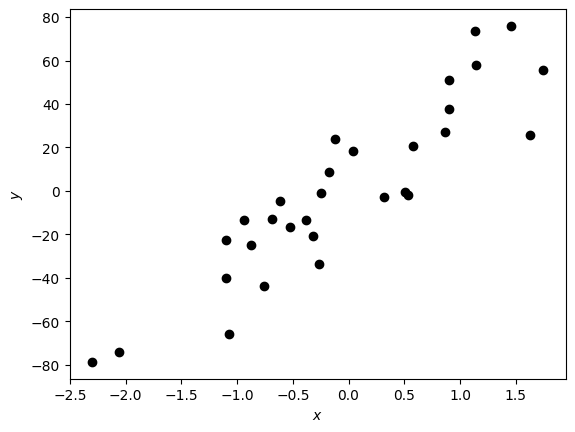

In [10]:
plt.scatter(X,  Y, c="black")

plt.xlabel("$x$")
plt.ylabel("$y$")

In [11]:
### START CODE HERE ### (~ 3 lines of code)
# Shape of variable X.
shape_X = np.shape(X)
# Shape of variable Y.
shape_Y = np.shape(Y)
# Training set size.
m = 30
### END CODE HERE ###

print ('The shape of X: ' + str(shape_X))
print ('The shape of Y: ' + str(shape_Y))
print ('I have m = %d training examples!' % (m))

The shape of X: (1, 30)
The shape of Y: (1, 30)
I have m = 30 training examples!


In [12]:
w3_unittest.test_shapes(shape_X, shape_Y, m)

 All tests passed


2 - Implementation of the Neural Network Model for Linear Regression

Let's setup the neural network in a way which will allow to extend this simple case of a model to more complicated structures later.

2.1 - Defining the Neural Network Structure

Exercise 2

Define two variables:

    n_x: the size of the input layer
    n_y: the size of the output layer



In [19]:
# GRADED FUNCTION: layer_sizes

def layer_sizes(X, Y):
    """
    Arguments:
    X -- input dataset of shape (input size, number of examples)
    Y -- labels of shape (output size, number of examples)
    
    Returns:
    n_x -- the size of the input layer
    n_y -- the size of the output layer
    """
    ### START CODE HERE ### (~ 2 lines of code)
    # Size of input layer.
    n_x = np.shape(X)[0]
    # Size of output layer.
    n_y = np.shape(Y)[0]
    ### END CODE HERE ###
    return (n_x, n_y)

In [20]:
(n_x, n_y) = layer_sizes(X, Y)
print("The size of the input layer is: n_x = " + str(n_x))
print("The size of the output layer is: n_y = " + str(n_y))

The size of the input layer is: n_x = 1
The size of the output layer is: n_y = 1


In [21]:
w3_unittest.test_layer_sizes(layer_sizes)

 All tests passed


In [42]:
# GRADED FUNCTION: initialize_parameters

def initialize_parameters(n_x, n_y):
    """
    Returns:
    params -- python dictionary containing your parameters:
                    W -- weight matrix of shape (n_y, n_x)
                    b -- bias value set as a vector of shape (n_y, 1)
    """
    
    ### START CODE HERE ### (~ 2 lines of code)
    W = np.random.randn(n_y, n_x) * 0.01
    b = np.zeros((n_y, 1))
    ### END CODE HERE ###
    
    assert (W.shape == (n_y, n_x))
    assert (b.shape == (n_y, 1))
    
    parameters = {"W": W,
                  "b": b}
    
    return parameters

In [43]:
parameters = initialize_parameters(n_x, n_y)
print("W = " + str(parameters["W"]))
print("b = " + str(parameters["b"]))

W = [[-0.01064195]]
b = [[0.]]


In [48]:
# GRADED FUNCTION: forward_propagation

def forward_propagation(X, parameters, n_y):
    """
    Argument:
    X -- input data of size (n_x, m)
    parameters -- python dictionary containing your parameters (output of initialization function)
    
    Returns:
    Y_hat -- The output of size (n_y, m)
    """
    # Retrieve each parameter from the dictionary "parameters".
    ### START CODE HERE ### (~ 2 lines of code)
    W = parameters["W"]
    b = parameters["b"]
    ### END CODE HERE ###
    
    # Implement Forward Propagation to calculate Z.
    ### START CODE HERE ### (~ 2 lines of code)
    Z = np.dot(np.array(W),np.array(X)) + b
    Y_hat = Z
    ### END CODE HERE ###
    
    assert(Y_hat.shape == (n_y, X.shape[1]))

    return Y_hat

In [49]:
Y_hat = forward_propagation(X, parameters, n_y)

print(Y_hat)

[[-0.0033952   0.01141848 -0.00920963  0.00183497 -0.0121821  -0.00534752
   0.02449287  0.0072762   0.00408709  0.00934213  0.02192392  0.01171274
   0.01170499 -0.01206552 -0.0185682   0.00130779  0.00995841 -0.01728621
  -0.01555968 -0.00959469  0.00810073 -0.00564402  0.00562078  0.00285085
  -0.00620229 -0.00044924 -0.00958687  0.00265379  0.00651028  0.00343115]]


In [50]:
def compute_cost(Y_hat, Y):
    """
    Computes the cost function as a sum of squares
    
    Arguments:
    Y_hat -- The output of the neural network of shape (n_y, number of examples)
    Y -- "true" labels vector of shape (n_y, number of examples)
    
    Returns:
    cost -- sum of squares scaled by 1/(2*number of examples)
    
    """
    # Number of examples.
    m = Y.shape[1]

    # Compute the cost function.
    cost = np.sum((Y_hat - Y)**2)/(2*m)
    
    return cost

In [51]:
print("cost = " + str(compute_cost(Y_hat, Y)))

cost = 791.2562582314174


In [52]:
parameters = w3_tools.train_nn(parameters, Y_hat, X, Y)

print("W = " + str(parameters["W"]))
print("b = " + str(parameters["b"]))

W = [[43.64012254]]
b = [[0.17721254]]


In [53]:
def nn_model(X, Y, num_iterations=10, print_cost=False):
    """
    Arguments:
    X -- dataset of shape (n_x, number of examples)
    Y -- labels of shape (n_y, number of examples)
    num_iterations -- number of iterations in the loop
    print_cost -- if True, print the cost every iteration
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to make predictions.
    """
    
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[1]
    
    # Initialize parameters
    ### START CODE HERE ### (~ 1 line of code)
    parameters = initialize_parameters(n_x, n_y)
    ### END CODE HERE ###
    
    # Loop
    for i in range(0, num_iterations):
         
        ### START CODE HERE ### (~ 2 lines of code)
        # Forward propagation. Inputs: "X, parameters, n_y". Outputs: "Y_hat".
        Y_hat = forward_propagation(X, parameters, n_y)
        
        # Cost function. Inputs: "Y_hat, Y". Outputs: "cost".
        cost = compute_cost(Y_hat, Y)
        ### END CODE HERE ###
        
        
        # Parameters update.
        parameters = w3_tools.train_nn(parameters, Y_hat, X, Y) 
        
        # Print the cost every iteration.
        if print_cost:
            print ("Cost after iteration %i: %f" %(i, cost))

    return parameters

In [54]:
parameters = nn_model(X, Y, num_iterations=15, print_cost=True)
print("W = " + str(parameters["W"]))
print("b = " + str(parameters["b"]))

W_simple = parameters["W"]
b_simple = parameters["b"]

Cost after iteration 0: 790.709960
Cost after iteration 1: 176.489399
Cost after iteration 2: 143.769292
Cost after iteration 3: 141.433370
Cost after iteration 4: 141.248724
Cost after iteration 5: 141.233726
Cost after iteration 6: 141.232500
Cost after iteration 7: 141.232400
Cost after iteration 8: 141.232391
Cost after iteration 9: 141.232391
Cost after iteration 10: 141.232391
Cost after iteration 11: 141.232391
Cost after iteration 12: 141.232391
Cost after iteration 13: 141.232391
Cost after iteration 14: 141.232391
W = [[35.71958208]]
b = [[2.2893077]]


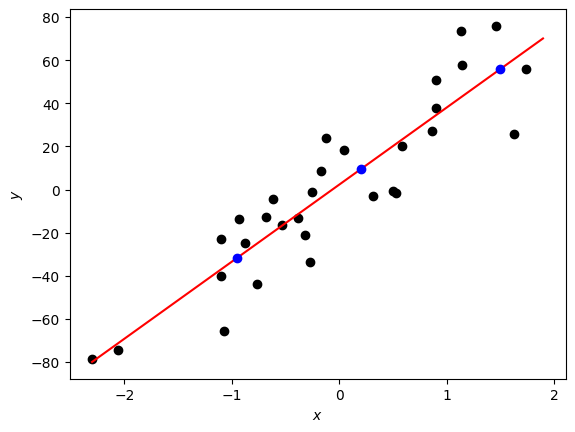

In [55]:
X_pred = np.array([-0.95, 0.2, 1.5])

fig, ax = plt.subplots()
plt.scatter(X, Y, color = "black")

plt.xlabel("$x$")
plt.ylabel("$y$")
    
X_line = np.arange(np.min(X[0,:]),np.max(X[0,:])*1.1, 0.1)
ax.plot(X_line, W_simple[0,0] * X_line + b_simple[0,0], "r")
ax.plot(X_pred, W_simple[0,0] * X_pred + b_simple[0,0], "bo")
plt.plot()
plt.show()

In [56]:
#multiple input single layer linear regression. Neral Network Model with single perceptron and two input nodes

In [57]:
df = pd.read_csv('house_prices_train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [60]:
X_multi = df[['GrLivArea', 'OverallQual']]
Y_multi = df['SalePrice']
print(f"X_multi:\n{X_multi}\n")
print(f"Y_multi:\n{Y_multi}\n")

X_multi:
      GrLivArea  OverallQual
0          1710            7
1          1262            6
2          1786            7
3          1717            7
4          2198            8
...         ...          ...
1455       1647            6
1456       2073            6
1457       2340            7
1458       1078            5
1459       1256            5

[1460 rows x 2 columns]

Y_multi:
0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64



In [68]:
X_multi_norm = (X_multi - np.mean(X_multi))/np.std(X_multi)
Y_multi_norm = (Y_multi - np.mean(Y_multi))/np.std(Y_multi)
X_multi_norm = np.array(X_multi_norm).T
Y_multi_norm = np.array(Y_multi_norm).reshape((1, len(Y_multi_norm)))

print ('The shape of X: ' + str(X_multi_norm.shape))
print ('The shape of Y: ' + str(Y_multi_norm.shape))
print ('I have m = %d training examples!' % (X_multi_norm.shape[1]))

The shape of X: (2, 1460)
The shape of Y: (1, 1460)
I have m = 1460 training examples!


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/numpy/core/fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


In [70]:
### START CODE HERE ### (~ 1 line of code)
parameters_multi = nn_model(X_multi_norm, Y_multi_norm, num_iterations=100, print_cost=False)
### END CODE HERE ###

print("W = " + str(parameters_multi["W"]))
print("b = " + str(parameters_multi["b"]))

W_multi = parameters_multi["W"]
b_multi = parameters_multi["b"]

W = [[nan nan]]
b = [[nan]]


/var/folders/tx/l6jnnmt13x50_18kqr2h63080000gn/T/ipykernel_60490/1076553675.py:17: RuntimeWarning: overflow encountered in square
  cost = np.sum((Y_hat - Y)**2)/(2*m)


In [66]:
X_pred_multi = np.array([[1710, 7], [1200, 6], [2200, 8]]).T

# Normalize using the same mean and standard deviation of the original training array X_multi.
X_multi_mean = np.array(np.mean(X_multi)).reshape((2,1))
X_multi_std = np.array(np.std(X_multi)).reshape((2,1))
X_pred_multi_norm = (X_pred_multi - X_multi_mean)/ X_multi_std
# Make predictions.
Y_pred_multi_norm = np.matmul(W_multi, X_pred_multi_norm) + b_multi
# Denormalize using the same mean and standard deviation of the original training array Y_multi.
Y_pred_multi = Y_pred_multi_norm * np.std(Y_multi) + np.mean(Y_multi)

print(f"Ground living area, square feet:\n{X_pred_multi[0]}")
print(f"Rates of the overall quality of material and finish, 1-10:\n{X_pred_multi[1]}")
print(f"Predictions of sales price, $:\n{np.round(Y_pred_multi)}")

ValueError: cannot reshape array of size 1 into shape (2,1)